#yolov8 keypoint detection

##ortam hazırlıgı

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [2]:
%cd /content/drive/MyDrive/yolov8/4_keypoint_detection

/content/drive/MyDrive/yolov8/4_keypoint_detection


## test/prediction

In [6]:
!yolo pose predict model=yolov8n-pose.pt source='/content/drive/MyDrive/yolov8/4_keypoint_detection/selena.jpg'

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 187 layers, 3,289,964 parameters, 0 gradients, 9.2 GFLOPs

image 1/1 /content/drive/MyDrive/yolov8/4_keypoint_detection/selena.jpg: 640x448 4 persons, 189.4ms
Speed: 10.2ms preprocess, 189.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/pose/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


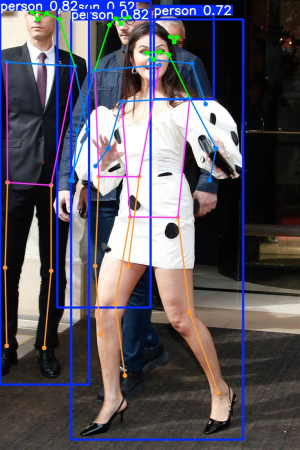

In [9]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
img_path="/content/drive/MyDrive/yolov8/4_keypoint_detection/runs/pose/predict2/selena.jpg"
img=cv2.imread(img_path)
img=imutils.resize(img,width=300)
cv2_imshow(img)


###python script ile aynı islem


image 1/1 /content/drive/MyDrive/yolov8/4_keypoint_detection/selena.jpg: 640x448 4 persons, 161.2ms
Speed: 3.1ms preprocess, 161.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


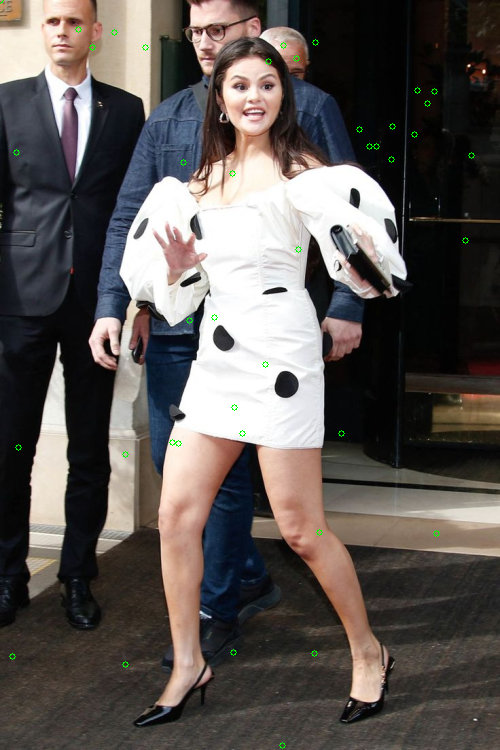

In [29]:
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

img_path="/content/drive/MyDrive/yolov8/4_keypoint_detection/selena.jpg"
model_path="/content/drive/MyDrive/yolov8/4_keypoint_detection/yolov8n-pose.pt"

img=cv2.imread(img_path)
img=imutils.resize(img,width=500)

model=YOLO(model_path)

results=model(img_path)[0]
#plotted_img=results.plot()
#cv2_imshow(plotted_img)

for result in results:
  points=np.array(result.keypoints.xy.cpu(),dtype="int")
  #print(points)
  for point in points:
   for p in point:
    #print(p)
    cv2.circle(img,(p[0],p[1]),3,(0,255,0),1)

cv2_imshow(img)



##training

In [3]:
!yolo pose train data=coco8-pose.yaml model=yolov8n-pose.pt epochs=8 imgsz=640 workers=8 batch=8 device=0 name=trainig_name

Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=8, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=trainig_name, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=